In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

# Loading Data

In [2]:
df = pd.read_csv('real_state.csv')

# EDA

In [3]:
df.head(10)

,Unnamed: 0,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
5,5,3300000,2018-03-02,21:18:42,55.908253,37.726448,81,1,4,5,1,32.0,6.0,1
6,6,4704280,2018-03-04,12:35:25,55.621097,37.431002,3,2,1,25,1,31.7,6.0,11
7,7,3600000,2018-03-04,20:52:38,59.875526,30.395457,2661,1,2,5,1,31.1,6.0,1
8,8,3390000,2018-03-05,07:07:05,53.195031,50.106952,3106,2,4,24,2,64.0,13.0,11
9,9,2800000,2018-03-06,09:57:10,55.736972,38.846457,81,1,9,10,2,55.0,8.0,1


View the number of rows and columns

In [4]:
df.shape

(500001, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500001 entries, 0 to 500000
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     500001 non-null  int64  
 1   price          500001 non-null  int64  
 2   date           500001 non-null  object 
 3   time           500001 non-null  object 
 4   geo_lat        500001 non-null  float64
 5   geo_lon        500001 non-null  float64
 6   region         500001 non-null  int64  
 7   building_type  500001 non-null  int64  
 8   level          500001 non-null  int64  
 9   levels         500001 non-null  int64  
 10  rooms          500001 non-null  int64  
 11  area           500001 non-null  float64
 12  kitchen_area   500001 non-null  float64
 13  object_type    500001 non-null  int64  
dtypes: float64(4), int64(8), object(2)
memory usage: 53.4+ MB


In [6]:
df.isna().sum()

Unnamed: 0       0
price            0
date             0
time             0
geo_lat          0
geo_lon          0
region           0
building_type    0
level            0
levels           0
rooms            0
area             0
kitchen_area     0
object_type      0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,500001.0,2.500000e+05,1.443380e+05,0.000000e+00,1.250000e+05,2.500000e+05,3.750000e+05,5.000000e+05
price,500001.0,3.929872e+06,1.664714e+07,-2.114150e+09,1.684200e+06,2.520000e+06,4.158000e+06,1.680000e+09
geo_lat,500001.0,5.392118e+01,4.663768e+00,4.145909e+01,5.413978e+01,5.505181e+01,5.598188e+01,7.198040e+01
geo_lon,500001.0,5.485186e+01,2.100943e+01,2.760133e+01,3.795930e+01,4.398563e+01,8.294353e+01,1.562811e+02
region,500001.0,4.567171e+03,3.528762e+03,3.000000e+00,2.661000e+03,2.922000e+03,9.654000e+03,1.488000e+04
building_type,500001.0,1.894402e+00,1.053559e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
level,500001.0,6.022350e+00,4.774487e+00,1.000000e+00,2.000000e+00,5.000000e+00,8.000000e+00,3.900000e+01
levels,500001.0,1.102669e+01,6.220420e+00,1.000000e+00,5.000000e+00,1.000000e+01,1.600000e+01,3.900000e+01
rooms,500001.0,1.807642e+00,9.313283e-01,-2.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
area,500001.0,5.384137e+01,2.784248e+01,5.000000e+00,3.900000e+01,4.802000e+01,6.300000e+01,4.444000e+03


In [8]:
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('*'*100)

Unnamed: 0
0         1
333344    1
333342    1
333341    1
333340    1
         ..
166663    1
166662    1
166661    1
166660    1
500000    1
Name: Unnamed: 0, Length: 500001, dtype: int64
****************************************************************************************************
price
1650000     7075
1700000     6781
1750000     6509
2500000     6176
2200000     6108
            ... 
3962700        1
11776050       1
1968600        1
5958150        1
1181000        1
Name: price, Length: 45868, dtype: int64
****************************************************************************************************
date
2018-09-18    21696
2018-10-10    10884
2018-11-15    10362
2018-10-29     9949
2018-09-28     9869
              ...  
2018-05-31        1
2018-05-30        1
2018-05-28        1
2018-05-24        1
2018-02-19        1
Name: date, Length: 179, dtype: int64
****************************************************************************************************
time
12:40

If we look at the column names, we'll notice we have not the trailing whitespace problem.

In [9]:
df.columns

Index(['Unnamed: 0', 'price', 'date', 'time', 'geo_lat', 'geo_lon', 'region',
       'building_type', 'level', 'levels', 'rooms', 'area', 'kitchen_area',
       'object_type'],
      dtype='object')

Now we're ready to start data cleaning.

From `.head()` it look like there is unwanted columns

In [10]:
df = df.drop(columns=['Unnamed: 0','time'])
df.head()

,price,date,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1


From `.info()` and `isna()` it looks like we don't have any null values in this dataset.  But check out the `.value_counts()` and `.describe()` It looks like the authors of this dataset have used -1 for studio rooms and -2 to signify missing values.  We could convert this now

In [11]:
# since -2 isn't often repeated and also it is missing value so dropping any real state which has number of rooms = -2 as it isn't logical** 
df = df[df['rooms'] != -2]
# since -1 refer to only room without liviing room so replacing any value of rooms with 0 instead of -1
df['rooms'] = df['rooms'].replace(-1 , 0)

In [12]:
df['rooms'].value_counts()

1    211912
2    163567
3    102700
4     12825
0      6671
5      1940
6       213
7        71
8        37
9        37
Name: rooms, dtype: int64

From `.value_counts()`, since we took a sample of dataset which is 500k instead of 5M and all date in 2018 so split the month from date

In [13]:
rn = df.copy()
rn['date'] = pd.to_datetime(df['date'])
rn.date = rn.date.dt.strftime('%y')
rn['date'].value_counts()

18    499973
Name: date, dtype: int64

In [14]:
df['date'] = pd.to_datetime(df['date'])
df.date = df.date.dt.strftime('%m')
df['date'].value_counts()

10    213348
09    176610
11    109796
08        80
07        39
04        28
03        25
06        25
05        19
02         3
Name: date, dtype: int64

# Data Visualization

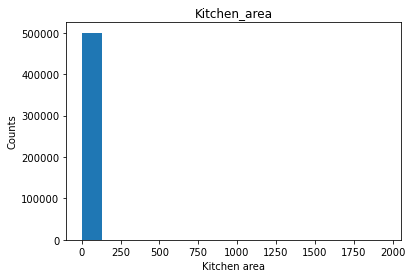

In [15]:
plt.hist(df['kitchen_area'],bins = 15)
plt.title('Kitchen_area')
plt.xlabel('Kitchen area')
plt.ylabel('Counts')
plt.show()

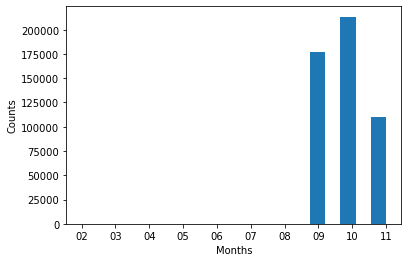

In [16]:
plt.hist(df['date'], bins = 20)
plt.xlabel('Months')
plt.ylabel('Counts')
plt.show()

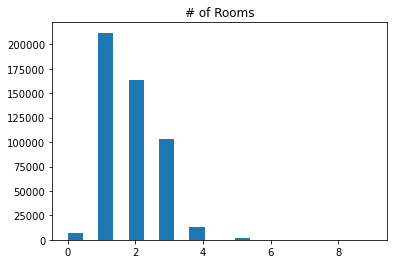

In [17]:
plt.hist(df['rooms'],bins =20);
plt.title('# of Rooms')
plt.show()

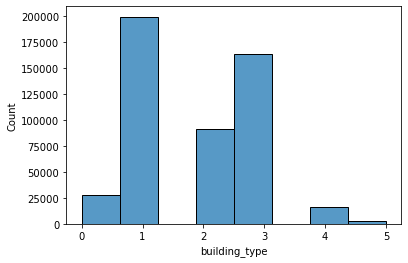

In [18]:
sns.histplot(df['building_type'],bins=8);

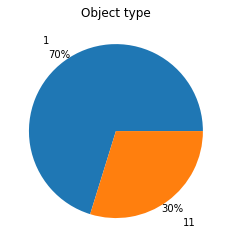

In [19]:
plt.pie(df['object_type'].value_counts(), labels=df['object_type'].unique(), autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.3)
plt.title("Object type")
plt.show()

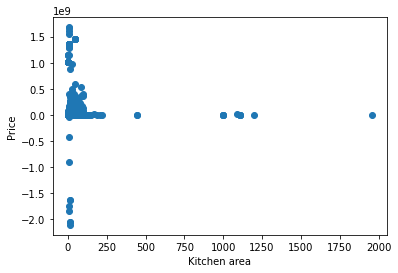

In [20]:
plt.scatter(df['kitchen_area'],df['price'])
plt.xlabel('Kitchen area')
plt.ylabel('Price');

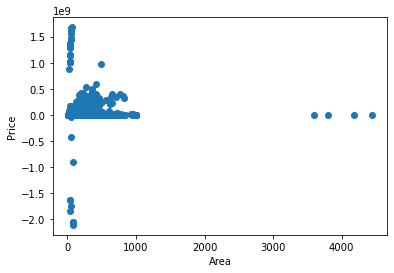

In [21]:
plt.scatter(df['area'],df['price'])
plt.xlabel('Area')
plt.ylabel('Price');

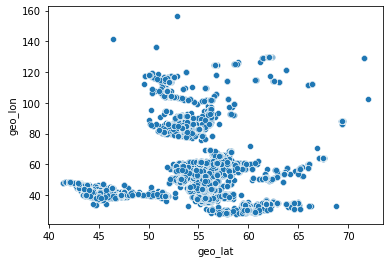

In [22]:
sns.scatterplot(x='geo_lat', y='geo_lon', data=df)
plt.show()

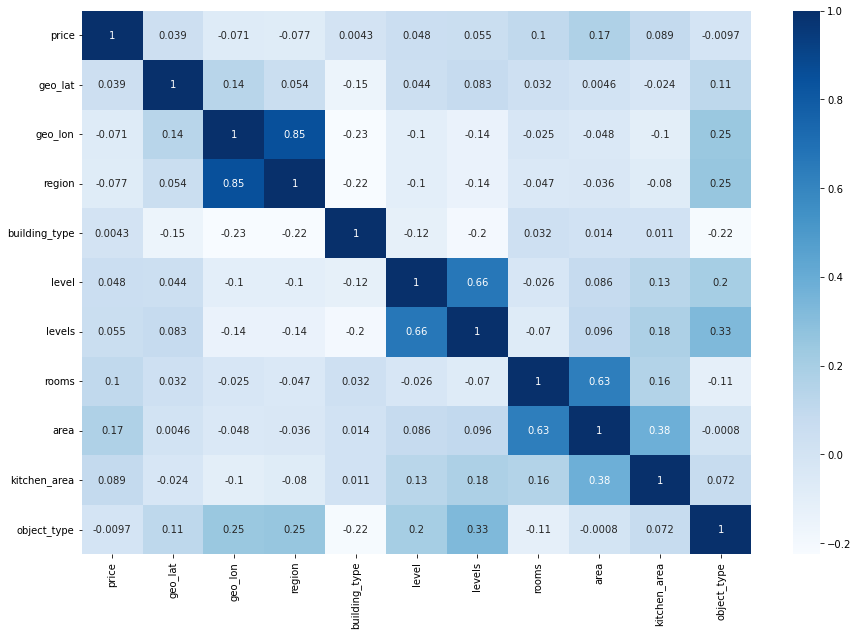

In [23]:
corr = df.corr()
f,axes = plt.subplots(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap='Blues')
plt.show()

In [24]:
sns.pairplot(df)

# Outliers

From `.describe()` and Visualization, remove outlires in price & area and kitchen area

In [25]:
#Choose the suitable range to deal with outliers

df = df[df['price']>1000000]
df = df[df['price']<50000000]
df = df[df['area']<1500]
df = df[df['kitchen_area']<1000]

In [26]:
df.shape

(475088, 12)

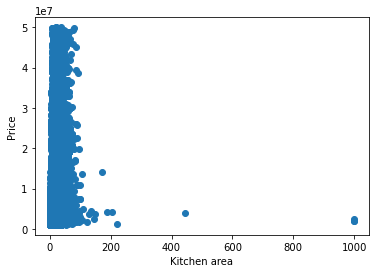

In [27]:
plt.scatter(df['kitchen_area'],df['price'])
plt.xlabel('Kitchen area')
plt.ylabel('Price');

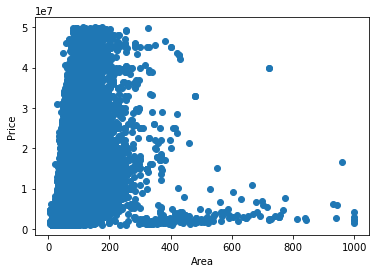

In [28]:
plt.scatter(df['area'],df['price'])
plt.xlabel('Area')
plt.ylabel('Price');

# Feature Engineering

In [29]:
#Create pivot to add new feature (Average Price)
price_pivot = df.pivot_table(index =['geo_lat' , 'geo_lon'], values = ['price'] ).reset_index()

price_pivot = price_pivot.rename({'price':'avg_price'},axis=1)

df = df.merge(price_pivot,on = ['geo_lat','geo_lon'], how='left')
df.head()

,price,date,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type,avg_price
0,6050000,02,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1,4.826000e+06
1,8650000,02,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1,8.733333e+06
2,4000000,02,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1,4.245680e+06
3,1850000,03,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11,2.450167e+06
4,5450000,03,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1,4.990000e+06


In [30]:
#df['geo_lat']

In [31]:
#df['geo_lon']

In [32]:
#df['geo_lat'] = np.sqrt(df['geo_lat'])
#df['geo_lon'] = np.sqrt(df['geo_lon'])

In [33]:
#df['geo_lat']

In [34]:
#df['geo_lon']

In [35]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,475088.0,3.736575e+06,3.699511e+06,1.000008e+06,1.750000e+06,2.600000e+06,4.254900e+06,4.999000e+07
geo_lat,475088.0,5.391240e+01,4.674809e+00,4.145909e+01,5.418093e+01,5.505765e+01,5.599194e+01,7.198040e+01
geo_lon,475088.0,5.436983e+01,2.091157e+01,2.760133e+01,3.788287e+01,4.384543e+01,8.292672e+01,1.366419e+02
region,475088.0,4.489040e+03,3.524025e+03,3.000000e+00,2.661000e+03,2.922000e+03,9.654000e+03,1.488000e+04
building_type,475088.0,1.885263e+00,1.047411e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
level,475088.0,6.135766e+00,4.822725e+00,1.000000e+00,2.000000e+00,5.000000e+00,9.000000e+00,3.900000e+01
levels,475088.0,1.124916e+01,6.241264e+00,1.000000e+00,5.000000e+00,1.000000e+01,1.600000e+01,3.900000e+01
rooms,475088.0,1.844164e+00,8.910543e-01,0.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,9.000000e+00
area,475088.0,5.432144e+01,2.398582e+01,5.000000e+00,3.935000e+01,4.894000e+01,6.313000e+01,1.000000e+03
kitchen_area,475088.0,1.056875e+01,5.980065e+00,5.000000e-02,7.000000e+00,9.900000e+00,1.240000e+01,9.999900e+02


randomly sample 1,000 rows 

In [36]:
 arr_samp = np.random.choice(df['price'], 1000, replace=False)
arr_samp.shape

(1000,)

In [37]:
    print(f"Mean: {np.mean(arr_samp)}")
    print(f"Median: {np.median(arr_samp)}")
    print(f"Standard deviation: {np.std(arr_samp)}")
    print(f"Index of largest: {np.argmax(arr_samp)}")
    print(f"Value of largest: {np.max(arr_samp)}")
    print(f"75th Percentile: {np.percentile(arr_samp, 75)}")
    print(f"max: {np.max(arr_samp)}")
    print(f"min: {np.min(arr_samp)}")

Mean: 3972929.394
Median: 2794500.0
Standard deviation: 4316073.146014072
Index of largest: 713
Value of largest: 49678800
75th Percentile: 4300000.0
max: 49678800
min: 1014520


Subtract 1000000 from all values that exceed 2000000

In [38]:
arr = np.where(arr_samp > 2000000, arr_samp - 1000000, arr_samp)
arr

array([ 1900000,  7200000,  1750000,  1200000,  6600000, 18000000,
       21000000,  1850000,  3300000,  1700000,  1200000,  3600000,
        1550000,  1120000,  2650000,  1450300,  1210000,  1675400,
        3100000,  8339108,  1900000,  4900000,  1450000,  3400000,
        1450000,  3700000,  1895000,  2446000,  1400000,  1180000,
        5400000,  1780000,  4700000,  3600000,  1100000,  1780000,
        1600000,  2900000,  1287000,  7000000,  1300000,  1750000,
        2250000,  8900000,  1385000,  5140020,  2420000,  3000000,
        1600000,  2750000,  2600000,  1800000,  9500000, 11644460,
        1550000, 11990000,  4700000,  2950000,  1800000,  1922580,
        1100000,  7300000,  2250000, 13900000,  1480000,  2410000,
        1675373,  7700000,  2400000,  1650000,  2050000,  1650000,
        1800000,  1190000,  1370000,  3250000,  1440000,  2100000,
        1800000,  1301000,  1050000,  1350000, 25780000,  2600000,
        1900000,  3200000,  1180000,  2650000,  3300000,  1350

In [39]:
arr.min(), arr.max()

(1009970, 48678800)

Now we're ready to start modeling! We're going to try out the validation process to choose between 3 models: linear regression, and Degree 2 polynomial regression and XGBRegressor.

Here we will break the data into 3 portions: 60% for training, 20% for validation , 20% for final testing evaluation

In [40]:
df['date'] = df['date'].astype('int') # data must be int, float, bool or category to can test it in XGBRegressor

target = df['price']
inputes = df.drop(columns = ['price'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 475088 entries, 0 to 475087
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   price          475088 non-null  int64  
 1   date           475088 non-null  int32  
 2   geo_lat        475088 non-null  float64
 3   geo_lon        475088 non-null  float64
 4   region         475088 non-null  int64  
 5   building_type  475088 non-null  int64  
 6   level          475088 non-null  int64  
 7   levels         475088 non-null  int64  
 8   rooms          475088 non-null  int64  
 9   area           475088 non-null  float64
 10  kitchen_area   475088 non-null  float64
 11  object_type    475088 non-null  int64  
 12  avg_price      475088 non-null  float64
dtypes: float64(5), int32(1), int64(7)
memory usage: 48.9 MB


Split the data into Train, Validate, and Test

In [41]:
train_inputs, test_inputs , train_target , test_target = train_test_split(inputes , target , test_size=0.2 , random_state=10)
train_inputs, validate_inputs , train_target , validate_target = train_test_split(train_inputs , train_target , test_size=0.25 , random_state=3)


# Models

Model #1 Linear Regression

In [42]:
lr = LinearRegression()

lr.fit(train_inputs,train_target)

print(f'Linear Regression train R^2: {lr.score(train_inputs, train_target):.3f}')
print(f'Linear Regression validate R^2: {lr.score(validate_inputs, validate_target):.3f}')
print(f'Linear Regression test R^2: {lr.score(test_inputs, test_target):.3f}')

Linear Regression train R^2: 0.857
Linear Regression validate R^2: 0.853
Linear Regression test R^2: 0.862


Model #2 Degree 2 polynomial regression

In [43]:
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(train_inputs)
X_val_poly = poly.transform(validate_inputs)
X_test_poly = poly.transform(test_inputs)

lr.fit(X_train_poly , train_target)

print(f'Degree 2 polynomial regression train R^2: {lr.score(X_train_poly, train_target):.3f}')
print(f'Degree 2 polynomial regression validate R^2: {lr.score(X_val_poly, validate_target):.3f}')
print(f'Degree 2 polynomial regression test R^2: {lr.score(X_test_poly, test_target):.3f}')

Degree 2 polynomial regression train R^2: 0.894
Degree 2 polynomial regression validate R^2: 0.891
Degree 2 polynomial regression test R^2: 0.898


Model #3 XGBRegressor

In [44]:
xgbModel = XGBRegressor()

xgbModel.fit(train_inputs,train_target)

print(f'XGBRegressor train R^2: {xgbModel.score(train_inputs, train_target):.3f}')
print(f'XGBRegressor validate R^2: {xgbModel.score(validate_inputs, validate_target):.3f}')
print(f'XGBRegressor test R^2: {xgbModel.score(test_inputs, test_target):.3f}')

XGBRegressor train R^2: 0.962
XGBRegressor validate R^2: 0.941
XGBRegressor test R^2: 0.943
